In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib as tb
from talib import stream
import mplfinance as mpf
from data_utils.get_data import *
from trendln import *
from indicators.indicators import *
from indicators.custom_indicators import *
from zigzag import *
%matplotlib inline

In [17]:
acq_window = 500
reg_window = 100
reg_mean = 75
deviation = 0.75 / 100

#Price to apply indicators on
price_col = 'Close'


In [18]:
path = './data/csv/EURUSD.s60.csv'

rates = load_frames(path)
rates.tail()
rates = rates[-acq_window:]

In [19]:
rates.tail()

,Open,High,Low,Close,Volume,timestamp
Date,,,,,,
2021-02-26 19:00:00,1.20914,1.20936,1.20734,1.20796,4981,1614366000
2021-02-26 20:00:00,1.20797,1.20862,1.20716,1.20829,4910,1614369600
2021-02-26 21:00:00,1.20827,1.20897,1.20762,1.20773,3493,1614373200
2021-02-26 22:00:00,1.20772,1.20790,1.20647,1.20649,3322,1614376800
2021-02-26 23:00:00,1.20651,1.20741,1.20619,1.20731,2697,1614380400


In [20]:
df_HA,keys = create_HA(rates)

c:\Users\hamza\Desktop\Stuff\temp\Forex_AI\PyForex\indicators\indicators.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_HA['Open'][i]= ( (rates['Open'][i] + rates['Close'][i] )/ 2)
c:\Users\hamza\Desktop\Stuff\temp\Forex_AI\PyForex\indicators\indicators.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_HA['Open'][i] = ( (rates['Open'][i-1] + rates['Close'][i-1] )/ 2)


In [21]:
%%capture
keys_1 = reg_envelopes(df_HA, price_col ,deviation,reg_window,reg_mean)
keys_2 = create_MACD(df_HA)
keys_3 = create_moving_average(df_HA,range1 = 55,range2 = 21)

In [22]:
addp = mpf.make_addplot(df_HA[keys_1])
addp2 = mpf.make_addplot(df_HA[keys_2],panel=2)
addp3 = mpf.make_addplot(df_HA[['MA1','MA2']])

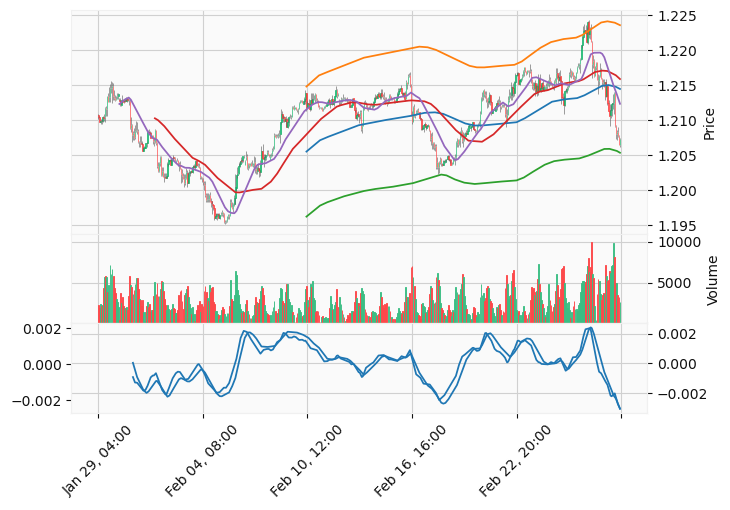

In [23]:
mpf.plot(rates, type='candle', volume = True,addplot = [addp,addp2,addp3], style = 'yahoo',show_nontrading = False,block=False)

In [24]:
minimaIdxs, maximaIdxs = get_extrema(
	rates.Close,
	extmethod=METHOD_NUMDIFF,
	accuracy=2)
# parameters and results are as per defined for calc_support_resistance
Extremum_indexes = sorted(minimaIdxs + maximaIdxs)

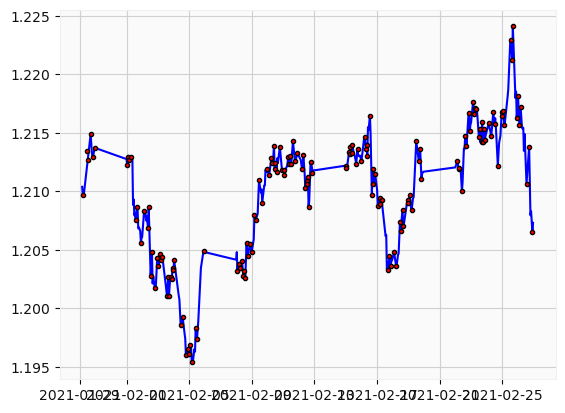

In [25]:
plt.plot(rates.Close,markevery=Extremum_indexes ,marker='.',c='blue', mfc='red', mec='k')

In [26]:
keys = create_zigzag(rates,pct = 0.2)

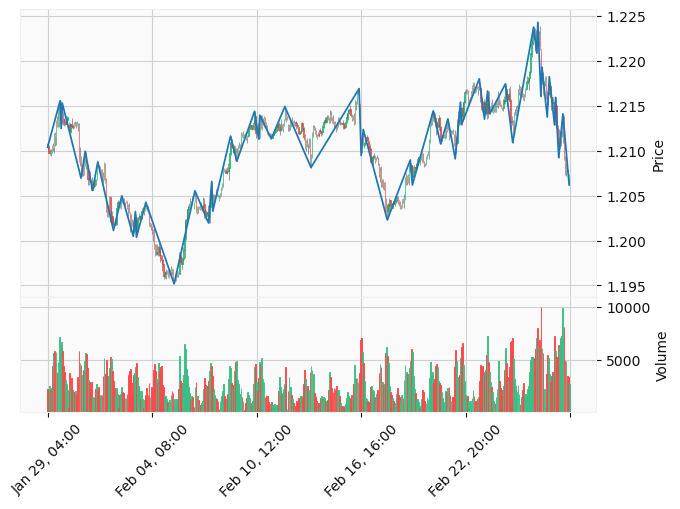

In [27]:
addp3 = mpf.make_addplot(rates[keys])
mpf.plot(rates, type='candle', volume = True,addplot = [addp3], style = 'yahoo',show_nontrading = False,block=False)

In [28]:
pivots = peak_valley_pivots(rates.Close.values, 0.001, -0.001)


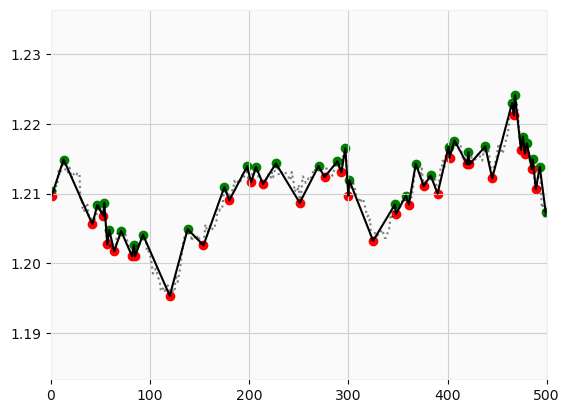

In [29]:
plot_pivots(rates.Close.values, pivots)


In [30]:
X_buy, X_buy_chart, Y_reg_buy, X_sell, X_sell_chart, Y_reg_sell, X_hold, X_hold_chart, Y_reg_hold = generate_data(rates, 
                                r = 1,
                                test = False,
                                save_img = True,
                                tp = 0.00500, 
                                sl = 0.00250, 
                                sl_h = 0.00150, 
                                window_range_back = 30, 
                                window_range_front = 15)

(8, 30, 7)
(8, 15, 7)
(8, 242, 336, 3)
(8, 30, 7)
(8, 15, 7)
(8, 242, 336, 3)
(17, 30, 7)
(17, 15, 7)
(17, 242, 336, 3)


In [31]:
x = X_buy_chart[0]

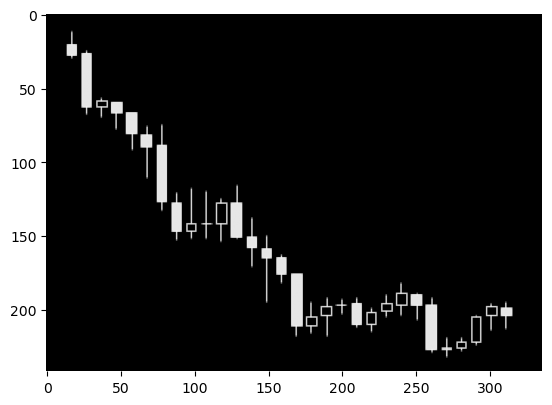

In [32]:
plt.imshow(x)
#Resolution, cropping and grid removal next.

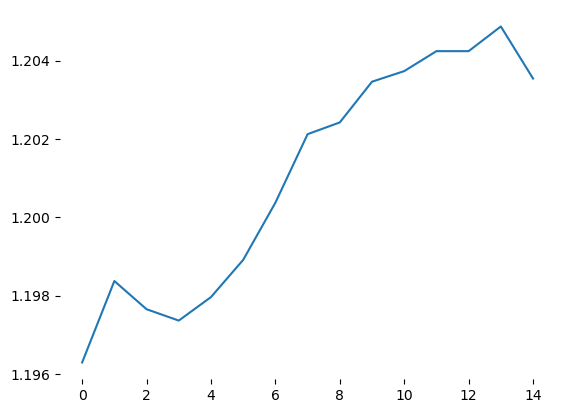

In [42]:
plt.plot(Y_reg_buy[0,:,0]) #the price following the previous buy chart [50 pips up]